In [1]:
import collections, math, os, sys
sys.path.insert(0, '../../../../FISH-annotation/Annotation')
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
from sklearn.neighbors import KDTree
import util
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
json_names = ['sz_0.5_snr_1_3_5_7_9_11.json', 
              'sz_0.5_snr_1_3_5_7_9_11_inv.json',
              'sz_1_snr_1_3_5_7_9_11.json', 
              'sz_1_snr_1_3_5_7_9_11_inv.json',
              'sz_1.75_snr_1_3.json', 
              'sz_1.75_snr_1_3_inv.json',
              'sz_1.75_snr_5_7_9_11.json', 
              'sz_1.75_snr_5_7_9_11_inv.json']
cwd = os.getcwd()

In [3]:
snr_list = [3,5,7,9,11]
clustering_params = ['AffinityPropagation', -350]
correctness_threshold = 4
declumping_params = ['KMeans', 2]
height = 300

## spot size = 0.5
original and inverted images

In [4]:
json_paths = [cwd + '/anno/sz_0.5_snr_1_3_5_7_9_11.json',
              cwd + '/anno/sz_0.5_snr_1_3_5_7_9_11_inv.json']

sensitivity_lists = []
specificity_lists = []

# for each file
for json_path in json_paths:
    sensitivity_list = []
    specificity_list = []
    # for each image
    for index in range(len(snr_list)):
        snr = snr_list[index]

        if(json_path == json_paths[0]):
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_0.5_spot_img.png'
            img_path = cwd + '/spot_images/og/' + img_name
            csv_path = cwd + '/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_0.5_coord_snr_list.csv'
        else:
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_0.5_spot_img_inv.png'
            img_path = cwd + '/spot_images/inv/' + img_name
            csv_path = cwd + '/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_0.5_coord_snr_list.csv'
        
        """ Get cluster centroids """
        qa = QuantiusAnnotation(json_path, img_name)
        anno_all = qa.df()
        sa = SpotAnnotationAnalysis(qa)

        clusters = sa.get_clusters(anno_all, clustering_params)
        cluster_size_threshold = util.get_cluster_size_threshold(clusters)
        small_clusters, large_clusters = util.sort_clusters_by_size(clusters, cluster_size_threshold)
        clumpiness_threshold = util.get_clumpiness_threshold(large_clusters)
        clumpy_clusters, nonclumpy_clusters = util.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
        result_clusters = nonclumpy_clusters
        for i in range(len(clumpy_clusters.index)):
            subclusters = util.declump(clumpy_clusters, i, declumping_params)
            result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)

        tpr, fpr = util.calc_fpr_tpr(clusters=result_clusters, csv_filepath=csv_path)
        sensitivity_list.append(tpr)
        specificity_list.append(1-fpr)
    
    sensitivity_lists.append(sensitivity_list)
    specificity_lists.append(specificity_list)


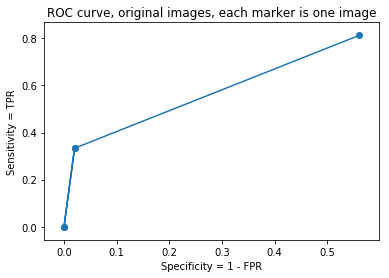

sensitivity [0.02, 0.0, 0.0, 0.02, 0.56]
specificity [0.33333333333333337, 0.0, 0.0, 0.33333333333333337, 0.8125]


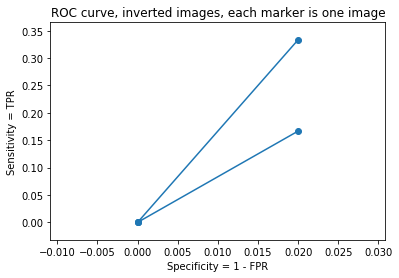

sensitivity [0.02, 0.0, 0.0, 0.0, 0.02]
specificity [0.33333333333333337, 0.0, 0.0, 0.0, 0.16666666666666663]


In [5]:
fig = plt.figure()
plt.scatter(sensitivity_lists[0], specificity_lists[0])
plt.plot(sensitivity_lists[0], specificity_lists[0])
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC curve, original images, each marker is one image')
plt.show()
print('sensitivity', sensitivity_lists[0])
print('specificity', specificity_lists[0])

fig = plt.figure()
plt.scatter(sensitivity_lists[1], specificity_lists[1])
plt.plot(sensitivity_lists[1], specificity_lists[1])
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC curve, inverted images, each marker is one image')
plt.show()
print('sensitivity', sensitivity_lists[1])
print('specificity', specificity_lists[1])


In [6]:
json_paths = [cwd + '/anno/sz_1_snr_1_3_5_7_9_11.json',
              cwd + '/anno/sz_1_snr_1_3_5_7_9_11_inv.json']

sensitivity_lists = []
specificity_lists = []

# for each file
for json_path in json_paths:
    sensitivity_list = []
    specificity_list = []
    # for each image
    for index in range(len(snr_list)):
        snr = snr_list[index]
        
        if(json_path == json_paths[0]):
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_1_spot_img.png'
            img_path = cwd + '/spot_images/og/' + img_name
            csv_path = cwd + '/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_1_coord_snr_list.csv'
        else:
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_1_spot_img_inv.png'
            img_path = cwd + '/spot_images/inv/' + img_name
            csv_path = cwd + '/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_1_coord_snr_list.csv'
        
        """ Get cluster centroids """
        qa = QuantiusAnnotation(json_path, img_name)
        anno_all = qa.df()
        sa = SpotAnnotationAnalysis(qa)

        clusters = sa.get_clusters(anno_all, clustering_params)
        cluster_size_threshold = util.get_cluster_size_threshold(clusters)
        small_clusters, large_clusters = util.sort_clusters_by_size(clusters, cluster_size_threshold)
        clumpiness_threshold = util.get_clumpiness_threshold(large_clusters)
        clumpy_clusters, nonclumpy_clusters = util.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
        result_clusters = nonclumpy_clusters
        for i in range(len(clumpy_clusters.index)):
            subclusters = util.declump(clumpy_clusters, i, declumping_params)
            result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)

        tpr, fpr = util.calc_fpr_tpr(clusters=result_clusters, csv_filepath=csv_path)
        sensitivity_list.append(tpr)
        specificity_list.append(1-fpr)
    
    sensitivity_lists.append(sensitivity_list)
    specificity_lists.append(specificity_list)


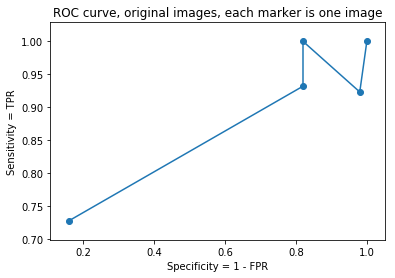

sensitivity [0.16, 0.82, 0.82, 0.98, 1.0]
specificity [0.7272727272727273, 0.9318181818181819, 1.0, 0.9230769230769231, 1.0]


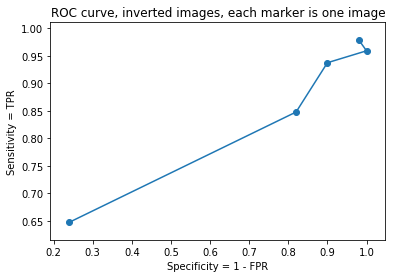

sensitivity [0.24, 0.82, 0.9, 1.0, 0.98]
specificity [0.6470588235294117, 0.8478260869565217, 0.9375, 0.9591836734693877, 0.9791666666666666]


In [7]:
fig = plt.figure()
plt.scatter(sensitivity_lists[0], specificity_lists[0])
plt.plot(sensitivity_lists[0], specificity_lists[0])
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC curve, original images, each marker is one image')
plt.show()
print('sensitivity', sensitivity_lists[0])
print('specificity', specificity_lists[0])

fig = plt.figure()
plt.scatter(sensitivity_lists[1], specificity_lists[1])
plt.plot(sensitivity_lists[1], specificity_lists[1])
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC curve, inverted images, each marker is one image')
plt.show()
print('sensitivity', sensitivity_lists[1])
print('specificity', specificity_lists[1])


## spot size = 1.75
original and inverted images

In [8]:
json_paths_1 = [cwd + '/anno/sz_1.75_snr_1_3.json',
               cwd + '/anno/sz_1.75_snr_1_3_inv.json']

sensitivity_lists_1 = []
specificity_lists_1 = []

# for each file
for json_path in json_paths_1:
    sensitivity_list = []
    specificity_list = []
    # for each image
    for index in range(len([3])):
        snr = snr_list[index]

        if(json_path == json_paths_1[0]):
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_img.png'
            img_path = cwd + '/spot_images/og/' + img_name
            csv_path = cwd + '/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_coord_snr_list.csv'
        else:
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_img_inv.png'
            img_path = cwd + '/spot_images/inv/' + img_name
            csv_path = cwd + '/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_coord_snr_list.csv'
        
        """ Get cluster centroids """
        qa = QuantiusAnnotation(json_path, img_name)
        anno_all = qa.df()
        sa = SpotAnnotationAnalysis(qa)

        clusters = sa.get_clusters(anno_all, clustering_params)
        cluster_size_threshold = util.get_cluster_size_threshold(clusters)
        small_clusters, large_clusters = util.sort_clusters_by_size(clusters, cluster_size_threshold)
        clumpiness_threshold = util.get_clumpiness_threshold(large_clusters)
        clumpy_clusters, nonclumpy_clusters = util.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
        result_clusters = nonclumpy_clusters
        for i in range(len(clumpy_clusters.index)):
            subclusters = util.declump(clumpy_clusters, i, declumping_params)
            result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)

        tpr, fpr = util.calc_fpr_tpr(clusters=result_clusters, csv_filepath=csv_path)
        sensitivity_list.append(tpr)
        specificity_list.append(1-fpr)
    
    sensitivity_lists_1.append(sensitivity_list)
    specificity_lists_1.append(specificity_list)



In [9]:
json_paths_2 = [cwd + '/anno/sz_1.75_snr_5_7_9_11.json', 
               cwd + '/anno/sz_1.75_snr_5_7_9_11_inv.json']

sensitivity_lists_2 = []
specificity_lists_2 = []
snr_list = [5,7,9,11]
# for each file
for json_path in json_paths_2:
    sensitivity_list = []
    specificity_list = []
    # for each image
    for index in range(len(snr_list)):
        snr = snr_list[index]

        if(json_path == json_paths_2[0]):
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_img.png'
            img_path = cwd + '/spot_images/og/' + img_name
            csv_path = cwd + '/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_coord_snr_list.csv'
        else:
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_img_inv.png'
            img_path = cwd + '/spot_images/inv/' + img_name
            csv_path = cwd + '/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_coord_snr_list.csv'
        
        """ Get cluster centroids """
        qa = QuantiusAnnotation(json_path, img_name)
        anno_all = qa.df()
        sa = SpotAnnotationAnalysis(qa)
        
        clusters = sa.get_clusters(anno_all, clustering_params)
        cluster_size_threshold = util.get_cluster_size_threshold(clusters)
        small_clusters, large_clusters = util.sort_clusters_by_size(clusters, cluster_size_threshold)
        clumpiness_threshold = util.get_clumpiness_threshold(large_clusters)
        clumpy_clusters, nonclumpy_clusters = util.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
        result_clusters = nonclumpy_clusters
        for i in range(len(clumpy_clusters.index)):
            subclusters = util.declump(clumpy_clusters, i, declumping_params)
            result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)
        tpr, fpr = util.calc_fpr_tpr(clusters=result_clusters, csv_filepath=csv_path)
        sensitivity_list.append(tpr)
        specificity_list.append(1-fpr)
    
    sensitivity_lists_2.append(sensitivity_list)
    specificity_lists_2.append(specificity_list)

In [10]:
sensitivity_list_og = sensitivity_lists_1[0] + sensitivity_lists_2[0]
sensitivity_list_inv = sensitivity_lists_1[1] + sensitivity_lists_2[1]
sensitivity_lists = [sensitivity_list_og, sensitivity_list_inv]

specificity_list_og = specificity_lists_1[0] + specificity_lists_2[0]
specificity_list_inv = specificity_lists_1[1] + specificity_lists_2[1]
specificity_lists = [sensitivity_list_og, sensitivity_list_inv]

snr_list = [3,5,7,9,11]

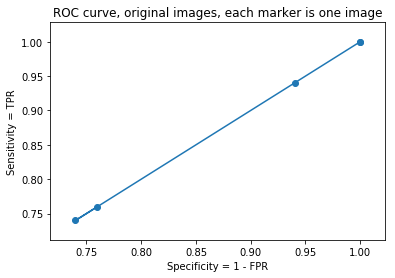

sensitivity [0.76, 0.74, 0.94, 1.0, 1.0]
specificity [0.76, 0.74, 0.94, 1.0, 1.0]


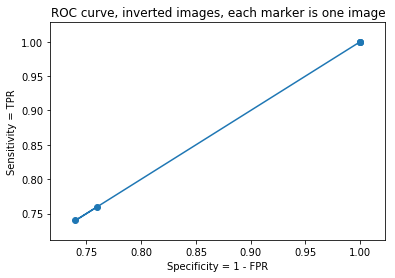

sensitivity [0.76, 0.74, 1.0, 1.0, 1.0]
specificity [0.76, 0.74, 1.0, 1.0, 1.0]


In [11]:
fig = plt.figure()
plt.scatter(sensitivity_lists[0], specificity_lists[0])
plt.plot(sensitivity_lists[0], specificity_lists[0])
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC curve, original images, each marker is one image')
plt.show()
print('sensitivity', sensitivity_lists[0])
print('specificity', specificity_lists[0])

fig = plt.figure()
plt.scatter(sensitivity_lists[1], specificity_lists[1])
plt.plot(sensitivity_lists[1], specificity_lists[1])
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC curve, inverted images, each marker is one image')
plt.show()
print('sensitivity', sensitivity_lists[1])
print('specificity', specificity_lists[1])
